<h1 align = "center">Data preprocessing</h1>

#### Problem niezbalansowanych danych

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("../data/raw/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Take care of unbalanced dataset

#### Feature scalling

We use RobustScaler as it is less prone to outliers.

In [5]:
from sklearn.preprocessing import RobustScaler

In [6]:
rob_scaler = RobustScaler()

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#### Dealing with imbalanced dataset

In [7]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(df.drop(['Class'], axis=1), df['Class'])

NameError: name 'SMOTE' is not defined

In [8]:
sns.countplot(y_sm)

NameError: name 'y_sm' is not defined

In [ ]:
# Features selection -> random forest 

## Feature selection -> refactor

In [8]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [9]:
X_sm = X_sm.astype("float16")

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3)

### Tu w teori koniec notebooka :)

In [26]:
def feature_forest_selector(X_train,y_ytrain,n_forest = 100):
    sel = SelectFromModel(RandomForestClassifier(n_estimators = n_forest))
    sel.fit(X,y)
    return sel

In [27]:
selector = feature_forest_selector(X_train,y_train)

In [24]:
dfx = df.drop(['Class'], axis=1)

In [14]:
df_selected = dfx[dfx.columns[(sel.get_support())]]

V14    0.214567
V10    0.125461
V11    0.115374
V12    0.109129
V4     0.075816
dtype: float64

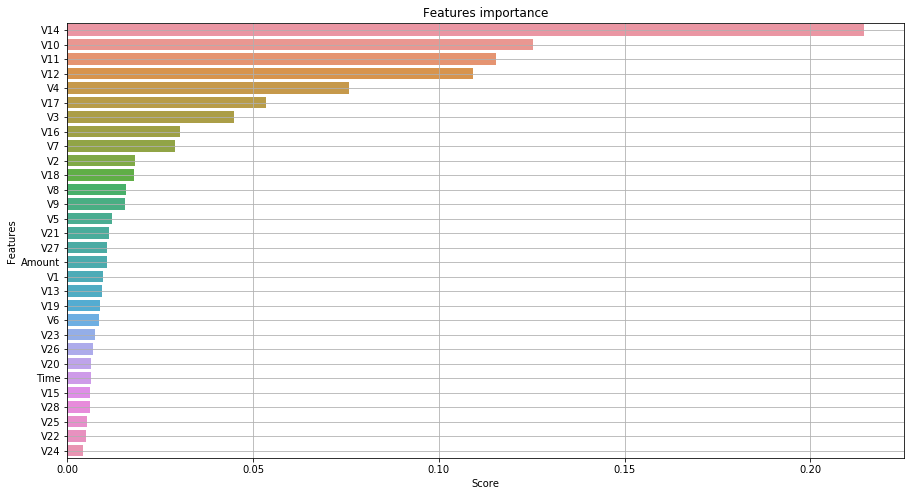

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index)
ax.set_title("Features importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Score")
ax.set_ylabel("Features")
plt.grid()
plt.show()

As we can see on features importance barplot the most important features are : 
    * V14
    * V10
    * V11
    * V12 
    * V4
    
If we look back at features density function we see that these features have different distribution in the view of class.

In [20]:
# Notebook kończy się splitem train_test :) 

In [ ]:
sel.estimator_.feature_importances_
feature_scores = pd.Series(sel.estimator_.feature_importances_, index=dfx.columns).sort_values(ascending=False)
feature_scores.head()